# NASA time series analysis demo
Example used here: Magnetic field data from *Wind* spacecraft

### Load libraries

In [1]:
import glob
from sunpy.net import Fido, attrs as a
from sunpy.timeseries import TimeSeries
import warnings
from sunpy.util import SunpyUserWarning

# Suppress the specific SunpyUserWarning
warnings.filterwarnings("ignore", category=SunpyUserWarning)

c:\Users\spann\Documents\Research\Code repos\sf_gap_analysis\venv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


### Download spacecraft data from CDAWeb
*Only run this section once! Once the data is downloaded, you don't need to download it again, so you should simply comment out the chunks below, up to the **Read data** section.*

To lookup the different dataset IDs available, you can use the form at https://cdaweb.gsfc.nasa.gov/index.html/ Tick the name of the spacecraft you want, hit submit, and you'll be a given a list of all the data products for that spacecraft. Set this as the `dataset_id` variable below.

In [2]:
dataset_id = "WI_H2_MFI"
# This corresponds to Wind Magnetic Fields Investigation, High-resolution Definitive Data

data_folder_path = "../data/raw/wind/"

start_time = "2018-01-01 00:00"
end_time = "2018-01-01 23:59"

trange = a.Time(start_time, end_time)
dataset = a.cdaweb.Dataset(dataset_id)
result = Fido.search(trange, dataset)

# Get the list of available files in this timerange
print(result)

Results from 1 Provider:

1 Results from the CDAWEBClient:
Source: https://cdaweb.gsfc.nasa.gov/index.html

 Dataset         Start time               End time       
--------- ----------------------- -----------------------
WI_H2_MFI 2018-01-01 00:00:00.000 2018-01-01 23:59:59.000




In [3]:
# Download these files
downloaded_files = Fido.fetch(result[0], path=data_folder_path)
print(downloaded_files)

Files Downloaded: 100%|██████████| 1/1 [00:01<00:00,  1.72s/file]

['..\\data\\raw\\wind\\wi_h2_mfi_20180101_v05.cdf']


### Read data

In [4]:
dataset_id = "WI_H2_MFI"
data_folder_path = "../data/raw/wind/"

data_file_paths = glob.glob(data_folder_path + "*.cdf")

data_raw = TimeSeries(
    data_file_paths[0],
    concatenate=True
)

### Get some information about the data

In [5]:
# data.columns
# data.units
# data.meta (This cuts off; better to use fn at end of this script)
# data.quicklook()  # Fun!
# data.truncate("2023/02/01 00:00", "2023/02/07 00:00").peek(columns=data.columns[0:3])

In [6]:
data_raw.units

{'BF1': Unit("nT"),
 'BGSE_0': Unit("nT"),
 'BGSE_1': Unit("nT"),
 'BGSE_2': Unit("nT"),
 'BGSM_0': Unit("nT"),
 'BGSM_1': Unit("nT"),
 'BGSM_2': Unit("nT"),
 'MAG_MODE': Unit(dimensionless),
 'RANGE': Unit(dimensionless),
 'SPC_MODE': Unit(dimensionless),
 'Time_PB5_0': Unit(dimensionless),
 'Time_PB5_1': Unit(dimensionless),
 'Time_PB5_2': Unit(dimensionless),
 'FLAG1_I': Unit(dimensionless),
 'FLAG1_O': Unit(dimensionless),
 'NUM1_PTS_I': Unit(dimensionless),
 'NUM1_PTS_O': Unit(dimensionless),
 'Time1_PB5_0': Unit(dimensionless),
 'Time1_PB5_1': Unit(dimensionless),
 'Time1_PB5_2': Unit(dimensionless)}

In [7]:
df_raw = data_raw.to_dataframe()
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 912207 entries, 2016-01-01 00:00:00.087000 to 2016-01-01 23:59:59.946000
Data columns (total 20 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   BF1          910767 non-null  float32
 1   BGSE_0       910767 non-null  float32
 2   BGSE_1       910767 non-null  float32
 3   BGSE_2       910767 non-null  float32
 4   BGSM_0       910767 non-null  float32
 5   BGSM_1       910767 non-null  float32
 6   BGSM_2       910767 non-null  float32
 7   MAG_MODE     910767 non-null  float64
 8   RANGE        910767 non-null  float64
 9   SPC_MODE     910767 non-null  float64
 10  Time_PB5_0   910767 non-null  float64
 11  Time_PB5_1   910767 non-null  float64
 12  Time_PB5_2   910767 non-null  float64
 13  FLAG1_I      1440 non-null    float64
 14  FLAG1_O      1440 non-null    float64
 15  NUM1_PTS_I   1440 non-null    float64
 16  NUM1_PTS_O   1440 non-null    float64
 17  Time1_PB5_0  1440 n

In [8]:
# Check the cadence of the data - note this may vary during an interval
top_cadences = df_raw.index.to_series().diff().value_counts().head()
top_cadences

0 days 00:00:00.092000    909253
0 days 00:00:00.184000        90
0 days 00:00:00.091000        37
0 days 00:00:00.054000        34
0 days 00:00:00.082000        34
Name: count, dtype: int64

In [9]:
# Resample the data to your chosen cadence
chosen_cadence = "1min" # 1 hour cadence
df = df_raw.resample(chosen_cadence).mean()
# Check the cadence of the data after resampling
df.info()
# Make sure it's not too big before plotting!

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1440 entries, 2016-01-01 00:00:00 to 2016-01-01 23:59:00
Freq: min
Data columns (total 20 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   BF1          1418 non-null   float32
 1   BGSE_0       1418 non-null   float32
 2   BGSE_1       1418 non-null   float32
 3   BGSE_2       1418 non-null   float32
 4   BGSM_0       1418 non-null   float32
 5   BGSM_1       1418 non-null   float32
 6   BGSM_2       1418 non-null   float32
 7   MAG_MODE     1418 non-null   float64
 8   RANGE        1418 non-null   float64
 9   SPC_MODE     1418 non-null   float64
 10  Time_PB5_0   1418 non-null   float64
 11  Time_PB5_1   1418 non-null   float64
 12  Time_PB5_2   1418 non-null   float64
 13  FLAG1_I      1440 non-null   float64
 14  FLAG1_O      1440 non-null   float64
 15  NUM1_PTS_I   1440 non-null   float64
 16  NUM1_PTS_O   1440 non-null   float64
 17  Time1_PB5_0  1440 non-null   float64
 18  Ti

### Plot some data

array([<Axes: xlabel='Date', ylabel='nT'>,
       <Axes: xlabel='Date', ylabel='nT'>,
       <Axes: xlabel='Date', ylabel='nT'>,
       <Axes: xlabel='Date', ylabel='nT'>], dtype=object)

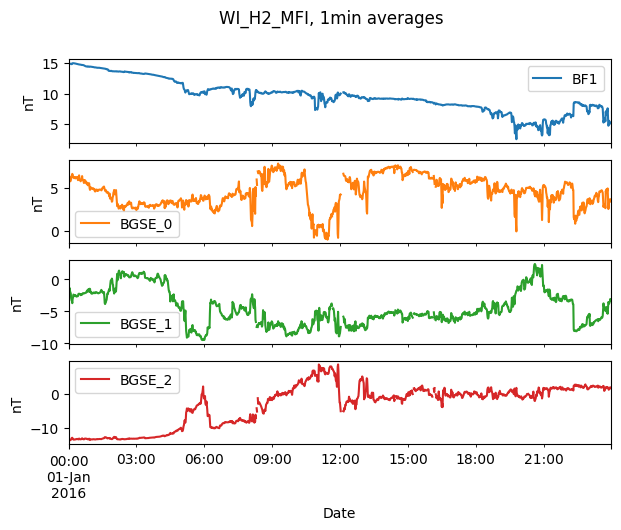

In [10]:
selected_columns = ["BF1", "BGSE_0", "BGSE_1", "BGSE_2"]
selected_time_range = ["2016-01-01", "2016-01-02"] # Change this to [:] to plot all data

df_to_plot = df.loc[selected_time_range[0]:selected_time_range[1], selected_columns]

df_to_plot.plot(
    subplots=True,
    figsize=(7, 5),
    title=f"{dataset_id}, {chosen_cadence} averages",
    xlabel="Date",
    ylabel="nT",
)

### Compute statistics

C:\Users\spann\AppData\Local\Temp\ipykernel_15428\3830870621.py:18: RuntimeWarning: divide by zero encountered in power
  plt.loglog(frequencies, frequencies**(-5/3)/500, 'r--', label='-5/3 slope')


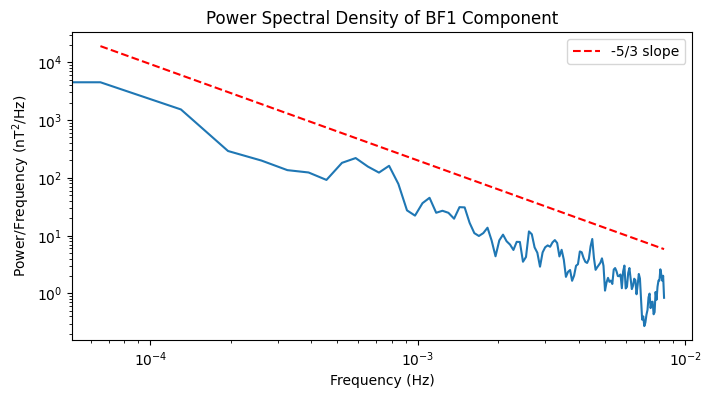

In [11]:
# Compute the power spectrum of the BF1 component of the data
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

# Select the BF1 component of the data
df_BF1 = df_to_plot["BF1"].dropna()
# Compute the power spectral density (PSD) using Welch's method
frequencies, psd = signal.welch(df_BF1, fs=1/60)

# Plot the PSD
plt.figure(figsize=(8, 4))
plt.loglog(frequencies, psd)
plt.title("Power Spectral Density of BF1 Component")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Power/Frequency (nT$^2$/Hz)")
# Add a -5/3 slope line to indicate the Kolmogorov spectrum
plt.loglog(frequencies, frequencies**(-5/3)/500, 'r--', label='-5/3 slope')
plt.legend()
plt.show()

### *Improved metadata printing*

In [12]:
def print_metadata_table(data=None, max_width=80):
    """
    Parse and print data in a nice readable table format with text wrapping.
    Handles both formats:
    1. ("key": "[value1, value2]") format
    2. {'key': [value1, value2]} dictionary-like format

    Args:
        file_path (str, optional): Path to the file containing the data.
        data_string (str, optional): String containing the data.
        max_width (int, optional): Maximum width for the value column. Default is 80.
    """
    import re
    import textwrap
    import ast

    # Try to parse as a Python dictionary first
    try:
        data_dict = ast.literal_eval(data)
        # If successful, format the dictionary items
        matches = [(key, str(value)) for key, value in data_dict.items()]
    except (SyntaxError, ValueError):
        # If not a valid dictionary, try the old format
        pattern = r"\('([^']+)': '(\[[^\]]+\])'\)"
        matches = re.findall(pattern, data)

        if not matches:
            # Try another pattern for tuple-like format without the extra quotes
            pattern = r"\('([^']+)': (\[[^\]]+\])\)"
            matches = re.findall(pattern, data)

            if not matches:
                raise ValueError("No valid data found in the provided input")

    # Find the longest key for formatting
    max_key_length = max(len(key) for key, _ in matches)

    # Print the table header
    print(f"{'KEY'.ljust(max_key_length)} | VALUE")
    print("-" * max_key_length + "-+-" + "-" * max_width)

    # Print the table content
    for key, value in matches:
        # Clean up the value: handle both list and string representations
        if value.startswith("[") and value.endswith("]"):
            # Parse the list-like string
            try:
                # Try to parse as a Python list
                value_list = ast.literal_eval(value)
                if isinstance(value_list, list):
                    items = [str(item) for item in value_list]
                else:
                    items = [value.strip("[]")]
            except (SyntaxError, ValueError):
                # If parsing fails, handle as a string with commas
                cleaned_value = value.strip("[]")
                if "', '" in cleaned_value:
                    items = cleaned_value.split("', '")
                else:
                    items = [cleaned_value]
        else:
            items = [value]

        # Print each item with proper wrapping
        for i, item in enumerate(items):
            # For multi-line text, wrap each item
            wrapper = textwrap.TextWrapper(
                width=max_width,
                initial_indent="" if i == 0 else " " * (max_key_length + 3),
                subsequent_indent=" " * (max_key_length + 3),
            )

            # Clean the item text
            item_text = item.strip().strip("'\"")

            # Print first item with key, others with proper indentation
            if i == 0:
                wrapped_lines = wrapper.wrap(item_text)
                print(
                    f"{key.ljust(max_key_length)} | {wrapped_lines[0] if wrapped_lines else ''}"
                )
                for line in wrapped_lines[1:]:
                    print(line)
            else:
                wrapped_lines = wrapper.wrap(item_text)
                for line in wrapped_lines:
                    print(line)

        # Add a separator line between entries
        print("-" * max_key_length + "-+-" + "-" * max_width)


# Example usage:
# print_data_table(file_path="paste.txt", max_width=70)

In [14]:
# data.meta cuts off: this is better
full_metadata = data_raw.meta.find().metas[0]
metadata_to_print = str(full_metadata)

print_metadata_table(metadata_to_print)

KEY                        | VALUE
---------------------------+---------------------------------------------------------------------------------
Project                    | ISTP>International Solar-Terrestrial Physics
---------------------------+---------------------------------------------------------------------------------
Discipline                 | Space Physics>Heliospheric Science
---------------------------+---------------------------------------------------------------------------------
Source_name                | WIND>Wind Interplanetary Plasma Laboratory
---------------------------+---------------------------------------------------------------------------------
Software_version           | V05.00
---------------------------+---------------------------------------------------------------------------------
Data_type                  | H2>High-resolution Definitive Data
---------------------------+-----------------------------------------------------------------------------